In [1]:
import warnings

import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

from scipy import stats

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
rc = {
#    "stats.information_criterion": "waic",
#    'stats.ic_scale': 'deviance',
    'stats.hdi_prob': 0.89
}
%config Inline.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams.update(rc)

In [3]:
num_weeks = int(1e5)
positions = np.zeros(num_weeks)
current = 10
for i in range(0, num_weeks):
    positions[i] = current
    proposal = current + np.random.choice([-1, 1], size=1)
    if proposal < 1: proposal = 10
    if proposal > 10: proposal = 1
        
    prob_move = proposal / current
    if np.random.uniform() < prob_move:
        current = proposal

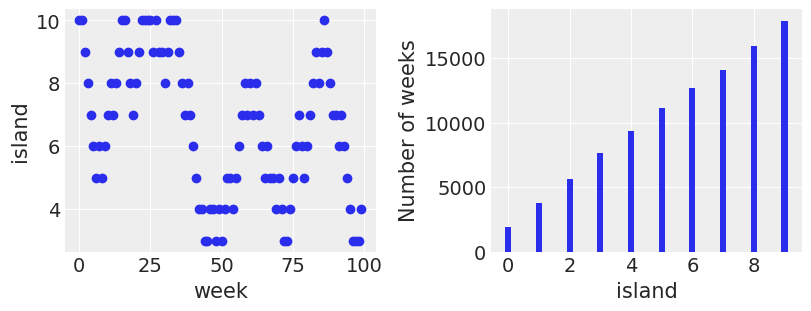

In [15]:
_, ax = plt.subplots(1, 2, figsize=(8,3))
ax[0].scatter(np.arange(0,100), positions[:100]);
ax[0].set_xlabel("week")
ax[0].set_ylabel("island")
counts, _ = np.histogram(positions, bins=10)
ax[1].bar(range(10), counts, width=0.2)
ax[1].set_xlabel("island")
ax[1].set_ylabel("Number of weeks")
ax[1].set_xticks(range(0,10,2))
ax[1].set_yticks(range(0,20000,5000));

In [17]:
y = np.array([-1, 1])
with pm.Model() as m92:
    alpha = pm.Normal("alpha", 0, 1000)
    sigma = pm.Exponential("sigma", 0.0001)
    y = pm.Normal("y", alpha, sigma, observed=y)
    m92_trace = pm.sample(chains=3)
az.summary(m92_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma, alpha]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 2 seconds.
There were 352 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.47724750237728153, but should be close to 0.8. Try to increase the number of tuning steps.
There were 482 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.39452738488018224, but should be close to 0.8. Try to increase the number of tuning steps.
There were 716 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.13638586321714435, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-4.33,303.14,-398.46,384.02,12.09,15.69,628.9,187.28,266.78,162.38,1.47
sigma,426.78,997.54,5.16,1019.34,189.19,135.20,27.8,27.80,4.70,7.43,1.70


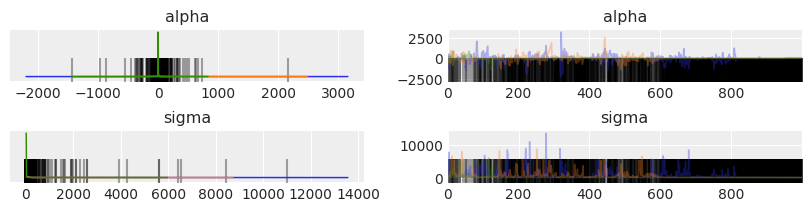

In [20]:
az.plot_trace(m92_trace, figsize=(8, 2));

In [21]:
y = np.array([-1, 1])
with pm.Model() as m93:
    alpha = pm.Normal("alpha", 1, 10)
    sigma = pm.Exponential("sigma", 0.0001)
    y = pm.Normal("y", alpha, sigma, observed=y)
    m93_trace = pm.sample(chains=3)
az.summary(m93_trace, round_to=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma, alpha]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 2 seconds.
There were 214 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5815105450274064, but should be close to 0.8. Try to increase the number of tuning steps.
There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
There were 75 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.45,5.76,-8.56,9.39,0.21,0.20,765.00,399.11,882.69,738.39,1.01
sigma,27.39,177.34,0.54,36.09,5.38,3.81,1084.79,1084.79,184.73,140.92,1.02
